In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
df = pd.read_csv("Salary Data.csv")
print(df.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [38]:
print(df.head())

   Age  Gender Education Level          Job Title  Years of Experience  Salary
0   32    Male      Bachelor's  Software Engineer                  5.0   90000
1   28  Female        Master's       Data Analyst                  3.0   65000
2   45    Male             PhD     Senior Manager                 15.0  150000
3   36  Female      Bachelor's    Sales Associate                  7.0   60000
4   52    Male        Master's           Director                 20.0  200000


In [39]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [40]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()


Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [41]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [42]:
# Logistic Regression

# Define a binary target variable: 1 if salary is above median, 0 otherwise
median_salary = df['Salary'].median()
df['Above Median Salary'] = (df['Salary'] > median_salary).astype(int)

# Drop the original 'Salary' column
df.drop('Salary', axis=1, inplace=True)

# Label encode categorical variables
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target variable
X = df.drop('Above Median Salary', axis=1)
y = df['Above Median Salary']

# Check for missing values
print(df.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Above Median Salary    0
dtype: int64
X_train shape: (5358, 5)
y_train shape: (5358,)
Accuracy: 0.8738805970149254
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       685
           1       0.88      0.86      0.87       655

    accuracy                           0.87      1340
   macro avg       0.87      0.87      0.87      1340
weighted avg       0.87      0.87      0.87      1340



In [43]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Define a custom scoring function for cross-validation using MAE
mae_scorer = make_scorer(mean_absolute_error)

# Perform cross-validation to compute MAE scores
cv_mae_scores = cross_val_score(model, X, y, cv=5, scoring=mae_scorer)
print("Cross-Validation MAE Scores:", cv_mae_scores)
print("Average Cross-Validation MAE Score:", cv_mae_scores.mean())

Mean Absolute Error (MAE): 0.12611940298507462
Cross-Validation MAE Scores: [0.27313433 0.22686567 0.10447761 0.10082151 0.04480956]
Average Cross-Validation MAE Score: 0.15002173598029273


In [44]:
# Feature of Importance

# Extract feature names
feature_names = X.columns

# Extract coefficients from the model
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importance
print(feature_importance)

               Feature  Coefficient  Absolute Coefficient
4  Years of Experience     5.988020              5.988020
0                  Age    -2.609775              2.609775
1               Gender     0.214907              0.214907
2      Education Level     0.190970              0.190970
3            Job Title     0.019999              0.019999


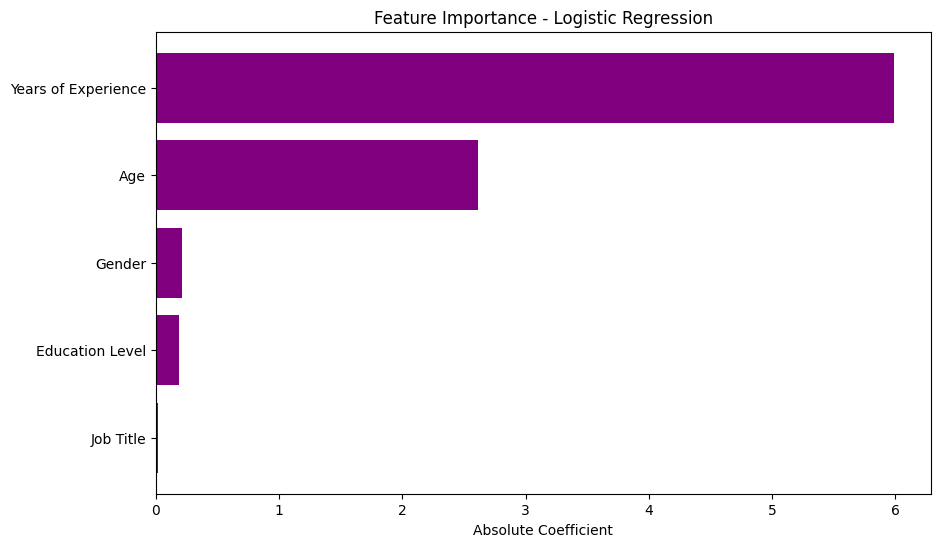

In [45]:
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'], color='purple')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

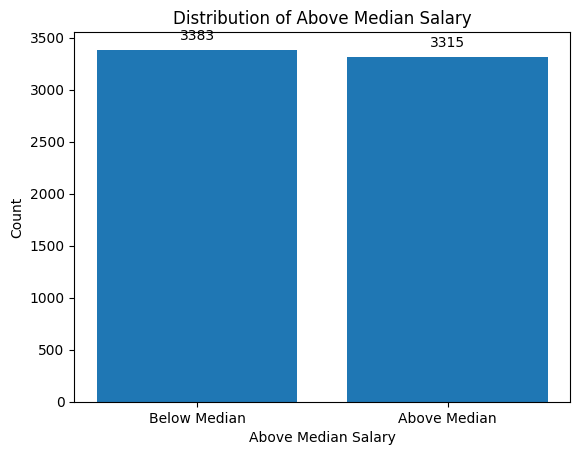

In [46]:
# Count the occurrences of each class
class_counts = df['Above Median Salary'].value_counts()

# Plot the bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Above Median Salary')
plt.ylabel('Count')
plt.title('Distribution of Above Median Salary')

# Add annotation for each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 100, str(count), ha='center')

# Show the plot
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.show()

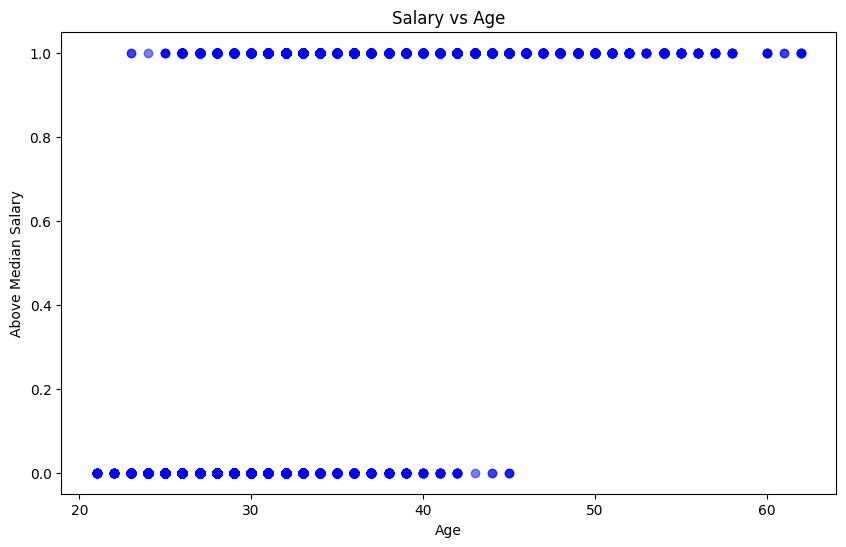

In [47]:
# Extracting 'Age' and 'Salary' columns from the dataframe
age = df['Age']
salary = df['Above Median Salary']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, salary, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Above Median Salary')

# Show plot
plt.show()